# Introduction

In [1]:
# imports the pcreode package
import pcreode
# matplotlib is a commonly used package for plotting
import matplotlib.pyplot as plt
# pandas is a package used for making the handling of large data sets easier 
import pandas as pd
# numpy is very common package for handling arrays and matrices
import numpy as np
# this line tells matplotlib to plot results inline with the current jupyter notebook
%matplotlib inline

In [2]:
file_nm = "/home/herrinca/workspace/alternate_routes/pCreode/data/Myeloid_with_IDs.csv"

In [3]:
data_raw = pd.read_csv( file_nm)

In [4]:
data_raw.shape

(4423, 171)

In [5]:
data_raw.head()

,1100001G20RIK,1190002H23RIK,1190007F08RIK,2210020M01RIK,3110082D06RIK,AK084954,IGHG1,ADSSL1,ALAD,ALAS1,...,TMSB4X,TNFAIP2,TNNI3,TREM3,TSPO,TYROBP,UQCRH,VAMP5,VIM,ZFPM1
0,0.0,0.0,0.0,0.21531,0.0,0.0,0.00000,0.00000,0.00000,0.21531,...,0.0,0.00000,0.0,0.0,0.78485,0.00000,0.21531,0.0,0.42138,0.00000
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.48538,0.00000,0.24974,...,0.0,0.00000,0.0,0.0,0.48538,0.00000,0.69874,0.0,0.00000,0.00000
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.72362,0.00000,0.00000,...,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.72362,0.0,0.00000,1.23670
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.70089,0.15136,0.15136,0.00000,...,0.0,0.15136,0.0,0.0,0.57547,0.15136,0.15136,0.0,0.15136,0.29939
4,0.0,0.0,0.0,0.24275,0.0,0.0,0.00000,0.00000,0.00000,0.00000,...,0.0,0.00000,0.0,0.0,0.86757,0.00000,0.00000,0.0,0.24275,0.00000


In [6]:
data_pca = pcreode.PCA( data_raw)

In [7]:
data_pca.get_pca()

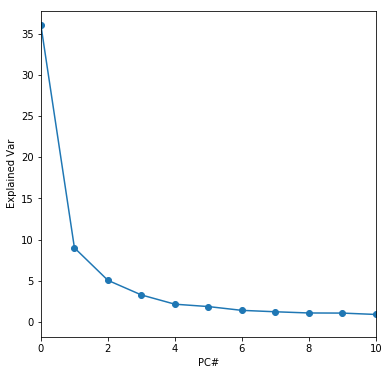

In [8]:
data_pca.pca_plot_explained_var( xlim=(0,10))

In [9]:
pca_test_data = data_pca.pca_set_components( 5)

(Text(0.5,0,'PC5'), Text(0,0.5,'PC4'))

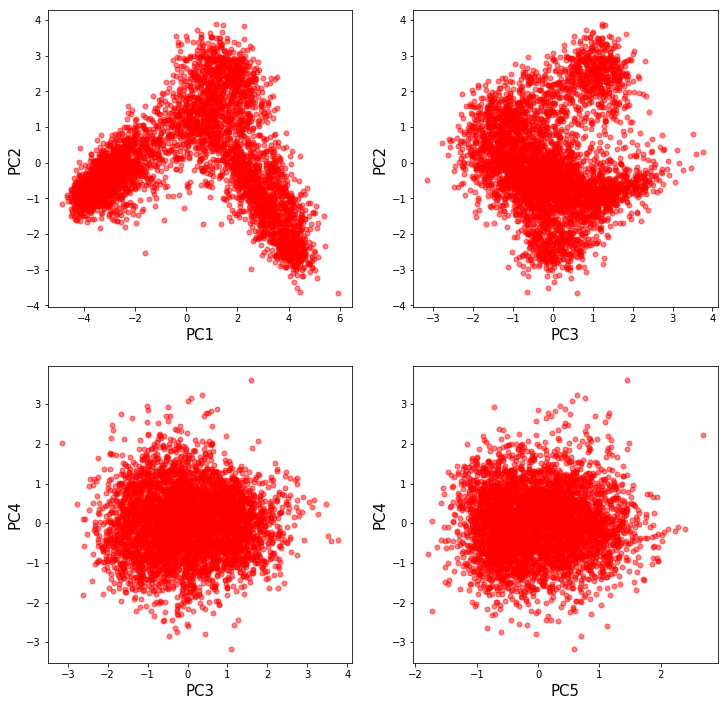

In [10]:
fig = plt.figure( figsize=(12,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
cc = 'r'
ax1.scatter( pca_test_data[:,0], pca_test_data[:,1], alpha=0.5, s=25, c=cc)
ax2.scatter( pca_test_data[:,2], pca_test_data[:,1], alpha=0.5, s=25, c=cc)
ax3.scatter( pca_test_data[:,2], pca_test_data[:,3], alpha=0.5, s=25, c=cc)
ax4.scatter( pca_test_data[:,4], pca_test_data[:,3], alpha=0.5, s=25, c=cc)
ax1.set_xlabel("PC1", fontsize=15), ax1.set_ylabel("PC2", fontsize=15)
ax2.set_xlabel("PC3", fontsize=15), ax2.set_ylabel("PC2", fontsize=15)
ax3.set_xlabel("PC3", fontsize=15), ax3.set_ylabel("PC4", fontsize=15)
ax4.set_xlabel("PC5", fontsize=15), ax4.set_ylabel("PC4", fontsize=15)

In [11]:
pca_reduced_data = data_pca.pca_set_components( 3)

In [12]:
dens = pcreode.Density( pca_reduced_data)

best guess starting radius = 0.605040651937


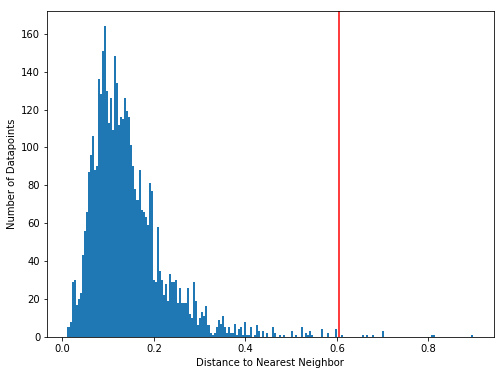

In [13]:
best_guess = dens.nearest_neighbor_hist( )

calculating densities for datapoints: 0 -> 4422
****Always check density overlay for radius fit****


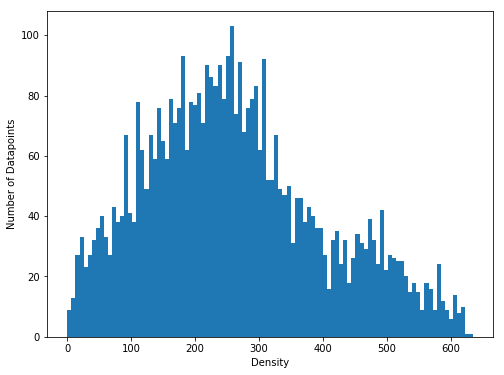

In [14]:
density_1 = dens.get_density( radius=1.0)
dens.density_hist( n_bins=100)

(Text(0.5,0,'PC3'), Text(0,0.5,'PC2'))

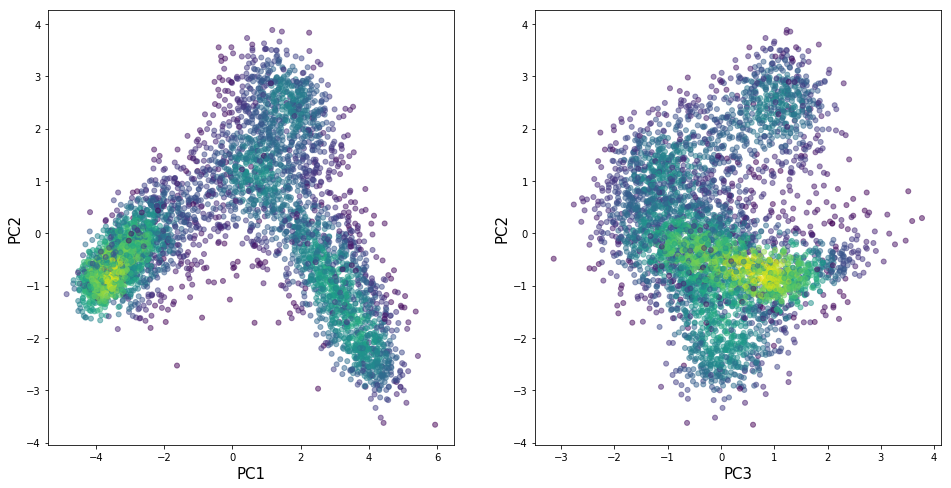

In [15]:
fig = plt.figure( figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
cc = density_1
ax1.scatter( pca_reduced_data[:,0], pca_reduced_data[:,1], alpha=0.5, s=25, c=cc)
ax2.scatter( pca_reduced_data[:,2], pca_reduced_data[:,1], alpha=0.5, s=25, c=cc)
ax1.set_xlabel("PC1", fontsize=15), ax1.set_ylabel("PC2", fontsize=15)
ax2.set_xlabel("PC3", fontsize=15), ax2.set_ylabel("PC2", fontsize=15)

In [16]:
noise = 8.0
target = 25.0

In [17]:
downed, downed_ind = pcreode.Down_Sample( pca_reduced_data, density_1, noise, target)

Number of data points in downsample = 2634


(Text(0.5,0,'PC3'), Text(0,0.5,'PC2'))

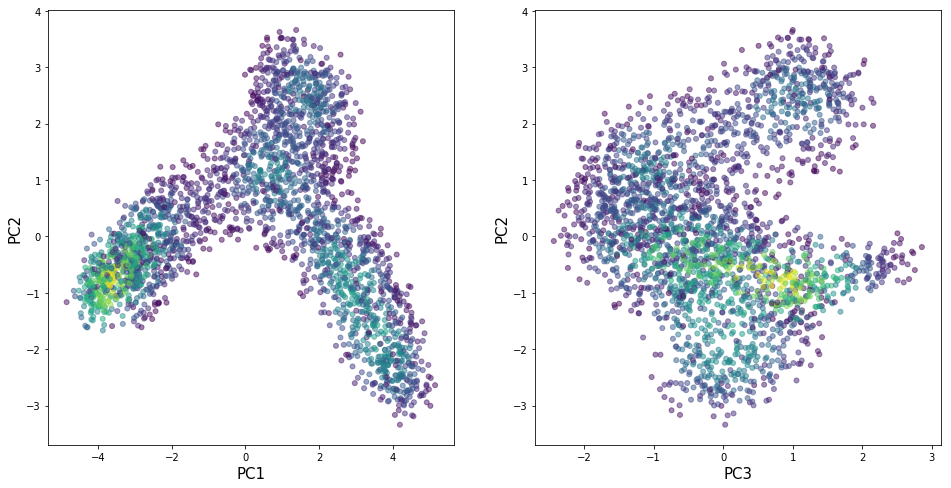

In [18]:
fig = plt.figure( figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
cc = density_1[downed_ind]
ax1.scatter( downed[:,0], downed[:,1], alpha=0.5, s=25, c=cc)
ax2.scatter( downed[:,2], downed[:,1], alpha=0.5, s=25, c=cc)
ax1.set_xlabel("PC1", fontsize=15), ax1.set_ylabel("PC2", fontsize=15)
ax2.set_xlabel("PC3", fontsize=15), ax2.set_ylabel("PC2", fontsize=15)

(Text(0.5,0,'PC3'), Text(0,0.5,'PC2'))

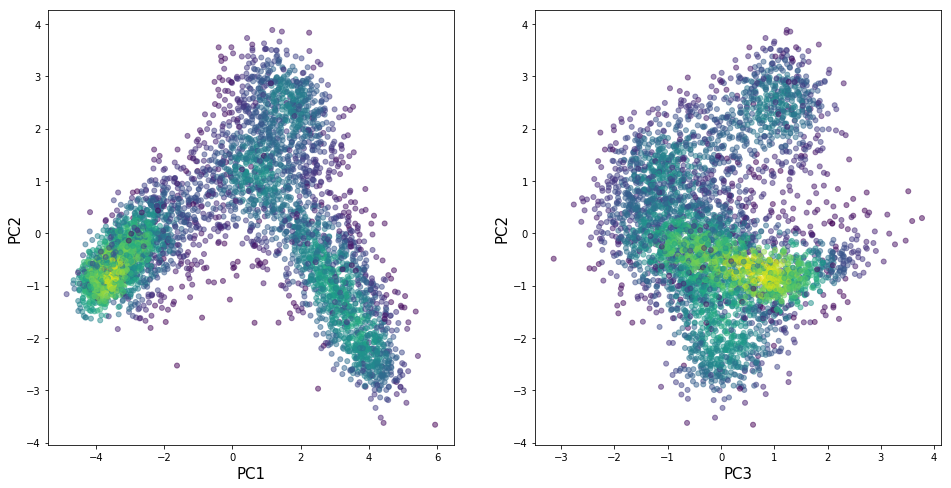

In [19]:
fig = plt.figure( figsize=(16,8))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
cc = density_1
ax1.scatter( pca_reduced_data[:,0], pca_reduced_data[:,1], alpha=0.5, s=25, c=cc)
ax2.scatter( pca_reduced_data[:,2], pca_reduced_data[:,1], alpha=0.5, s=25, c=cc)
ax1.set_xlabel("PC1", fontsize=15), ax1.set_ylabel("PC2", fontsize=15)
ax2.set_xlabel("PC3", fontsize=15), ax2.set_ylabel("PC2", fontsize=15)

In [20]:
file_path = "/home/herrinca/Desktop/Test/"

In [21]:
out_graph, out_ids = pcreode.pCreode( data=pca_reduced_data, density=density_1, noise=noise, 
                                      target=target, file_path=file_path, num_runs=10, mute=True)

KeyboardInterrupt: 

# p-Creode graph scoring

In [21]:
graph_ranks = pcreode.pCreode_Scoring( data=pca_reduced_data, file_path=file_path, num_graphs=10)

scoring graph 1
scoring graph 2
scoring graph 3
scoring graph 4
scoring graph 5
scoring graph 6
scoring graph 7
scoring graph 8
scoring graph 9
Most representative graph IDs from first to worst [7 8 3 6 1 9 0 5 4 2]


In [22]:
gid = graph_ranks[0] # this will select the first graph ID in the ranking from above
print gid

7


In [23]:
analysis = pcreode.Analysis( file_path=file_path, graph_id=gid, data=pca_reduced_data, density=density_1, noise=noise)

In [24]:
seed = 1

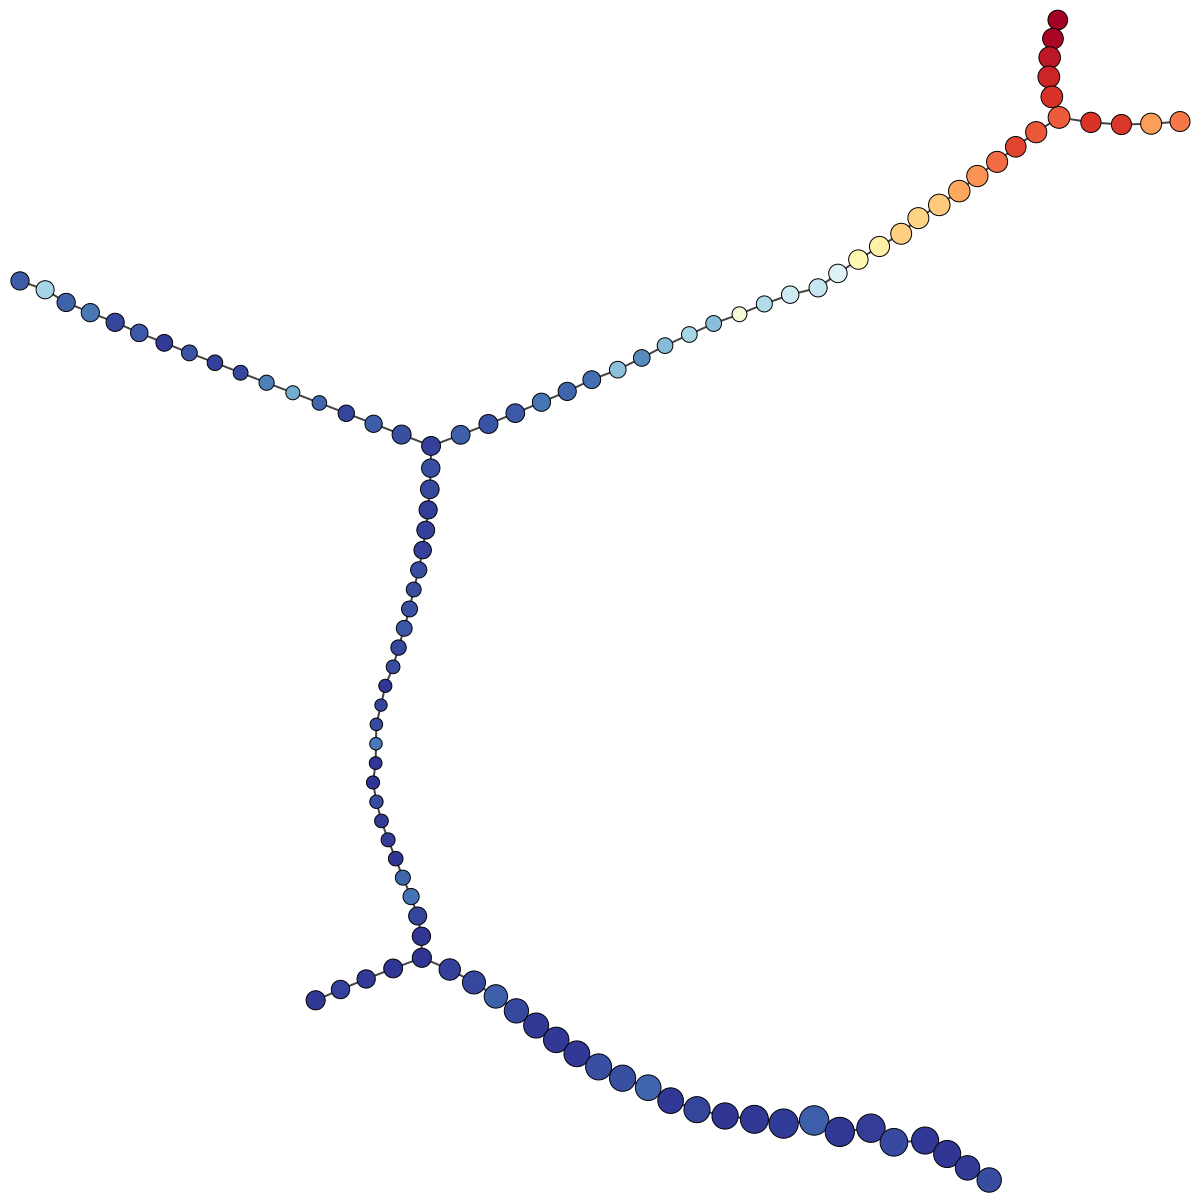

In [100]:
analysis.plot_save_graph( seed=seed, overlay=data_raw['ELANE'], file_out='ELANE', upper_range=1.25)

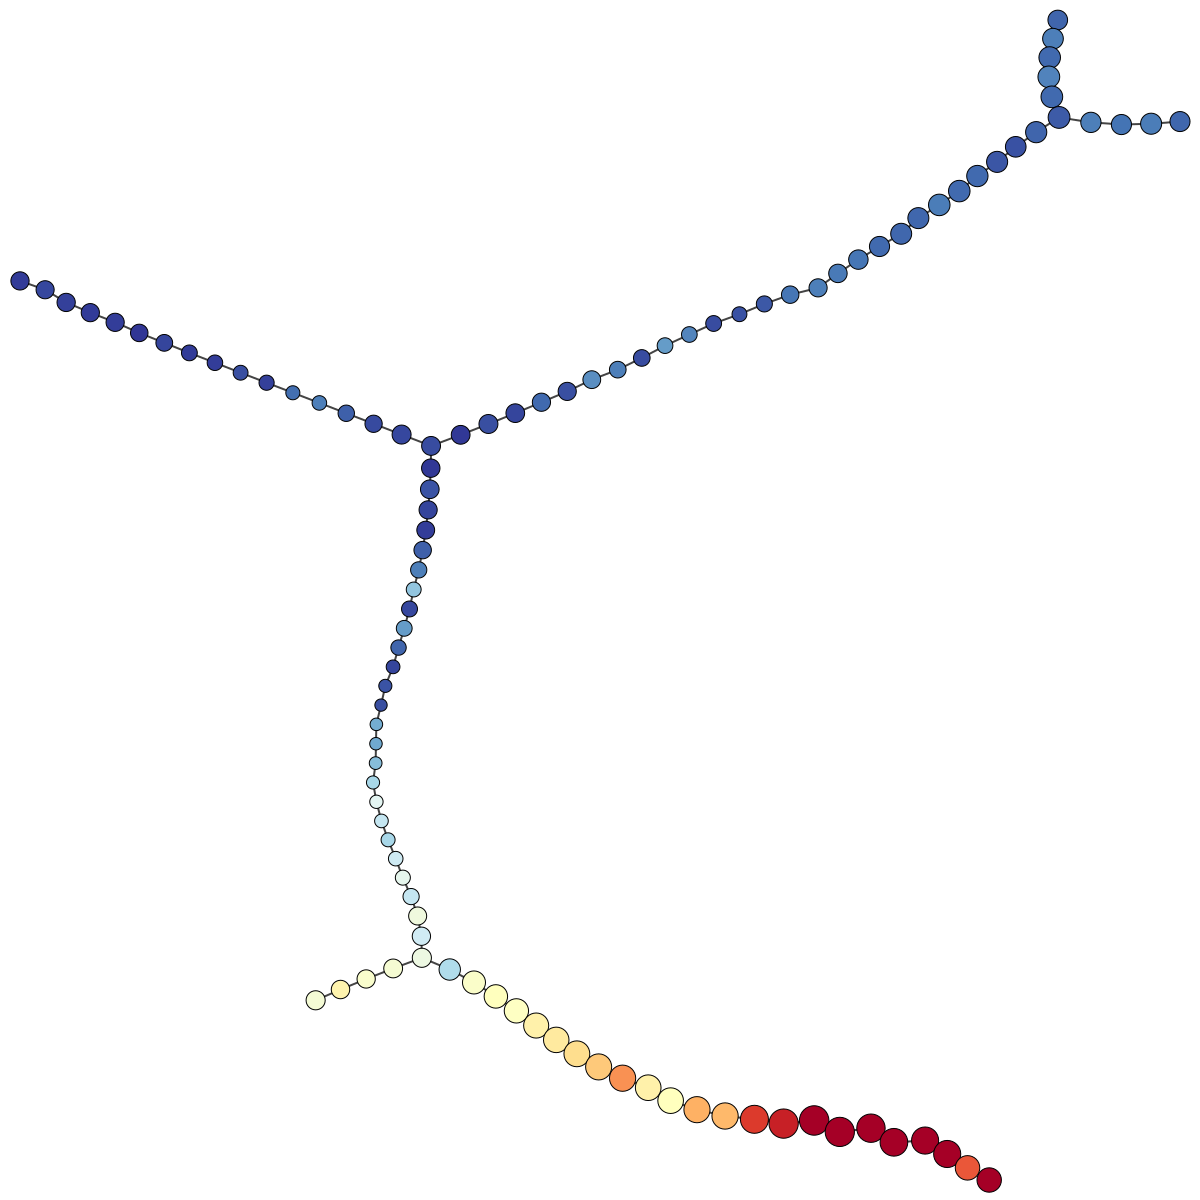

In [26]:
analysis.plot_save_graph( seed=seed, overlay=data_raw['CAR2'], file_out='CAR2', upper_range=1.5)

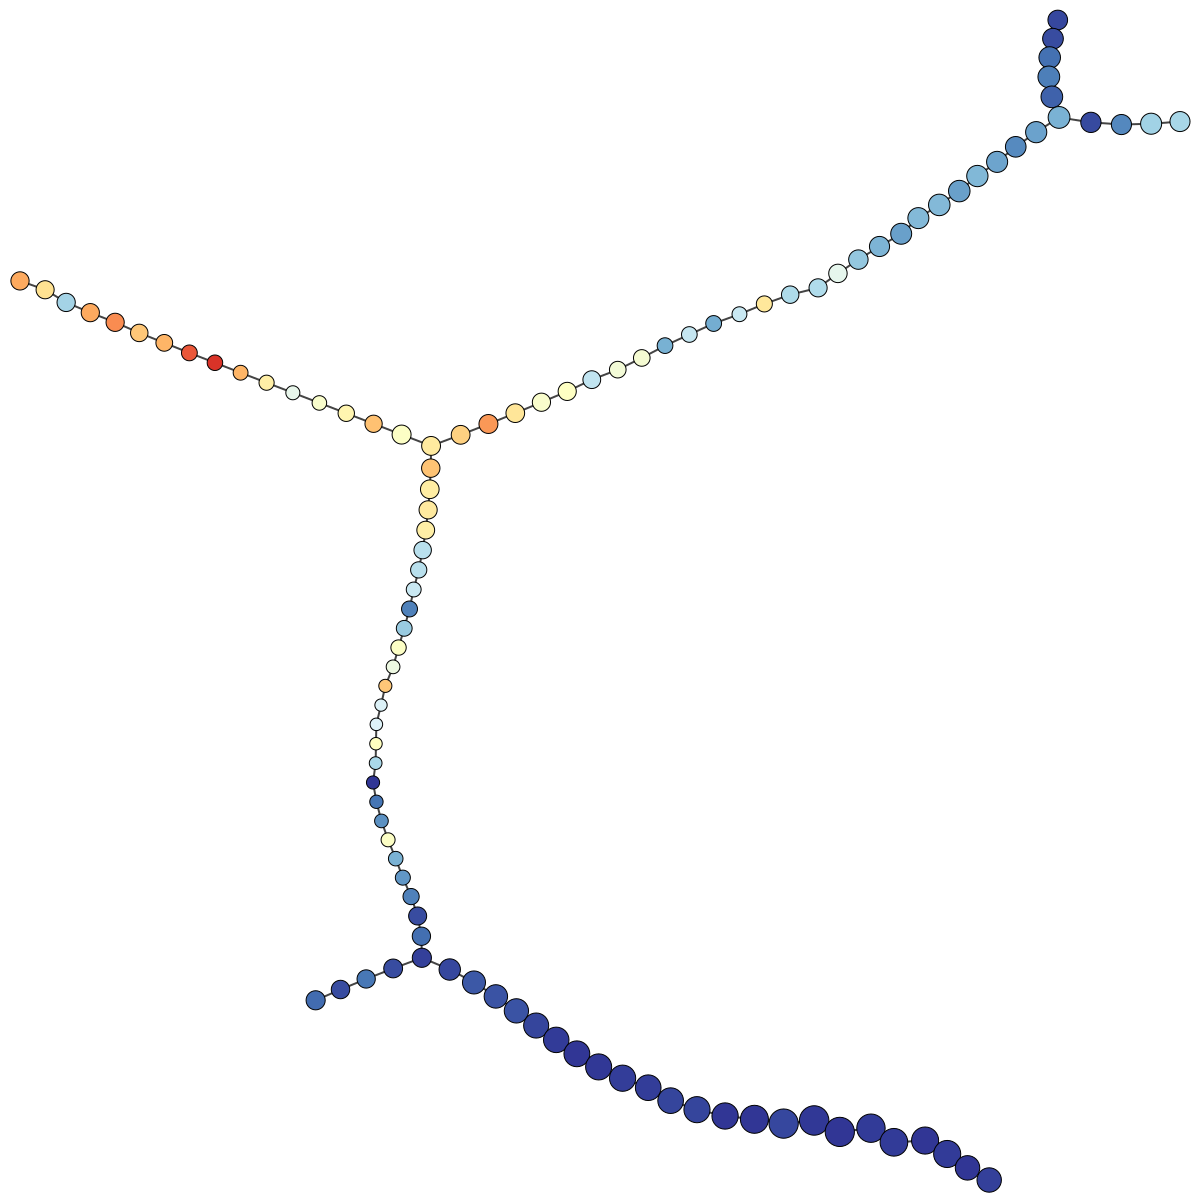

In [27]:
analysis.plot_save_graph( seed=seed, overlay=data_raw['CD34'], file_out='CD34', upper_range=2.5)

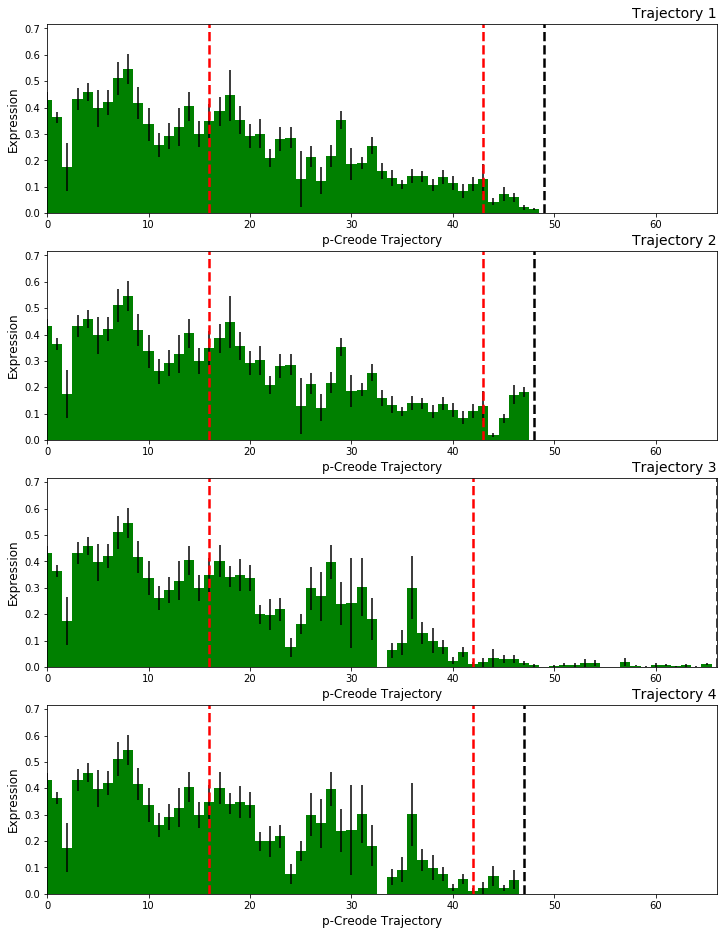

In [28]:
analysis.plot_analyte_dynamics( data_raw['CD34'], 2)

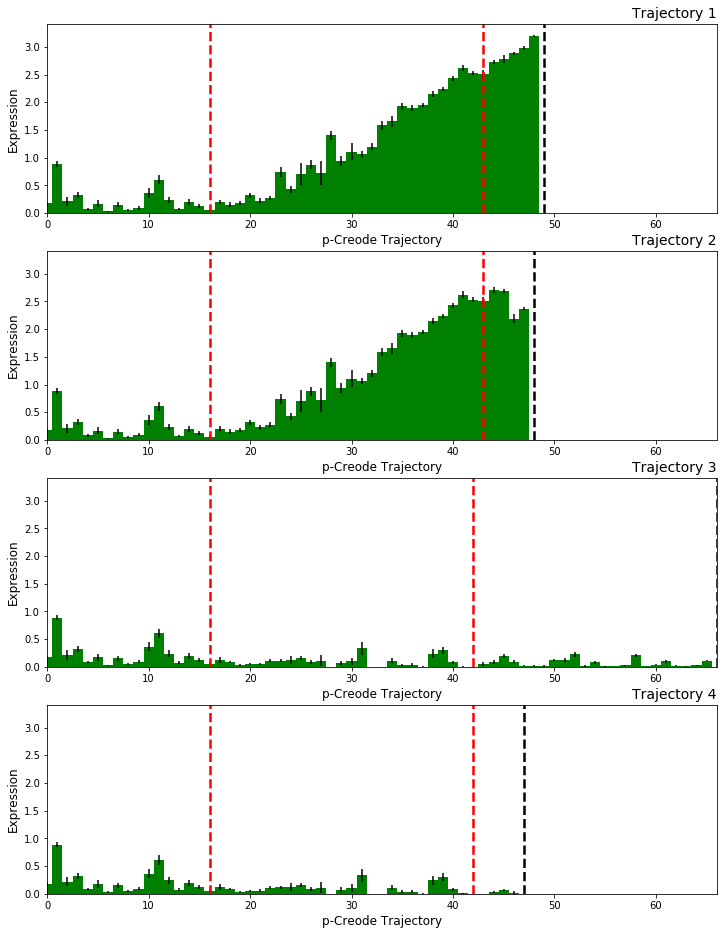

In [29]:
analysis.plot_analyte_dynamics( data_raw.ELANE, 2)

In [30]:
analysis.get_complete_analyte_gene_trajectories( data_raw, 2, file_out='Myeloid')

In [31]:
w_adj = pcreode.return_weighted_adj( pca_reduced_data, file_path, gid)
w_adj

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.19405834,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.19405834, 0.        ,
        0.22957399],
       [0.        , 0.        , 0.        , ..., 0.        , 0.22957399,
        0.        ]])

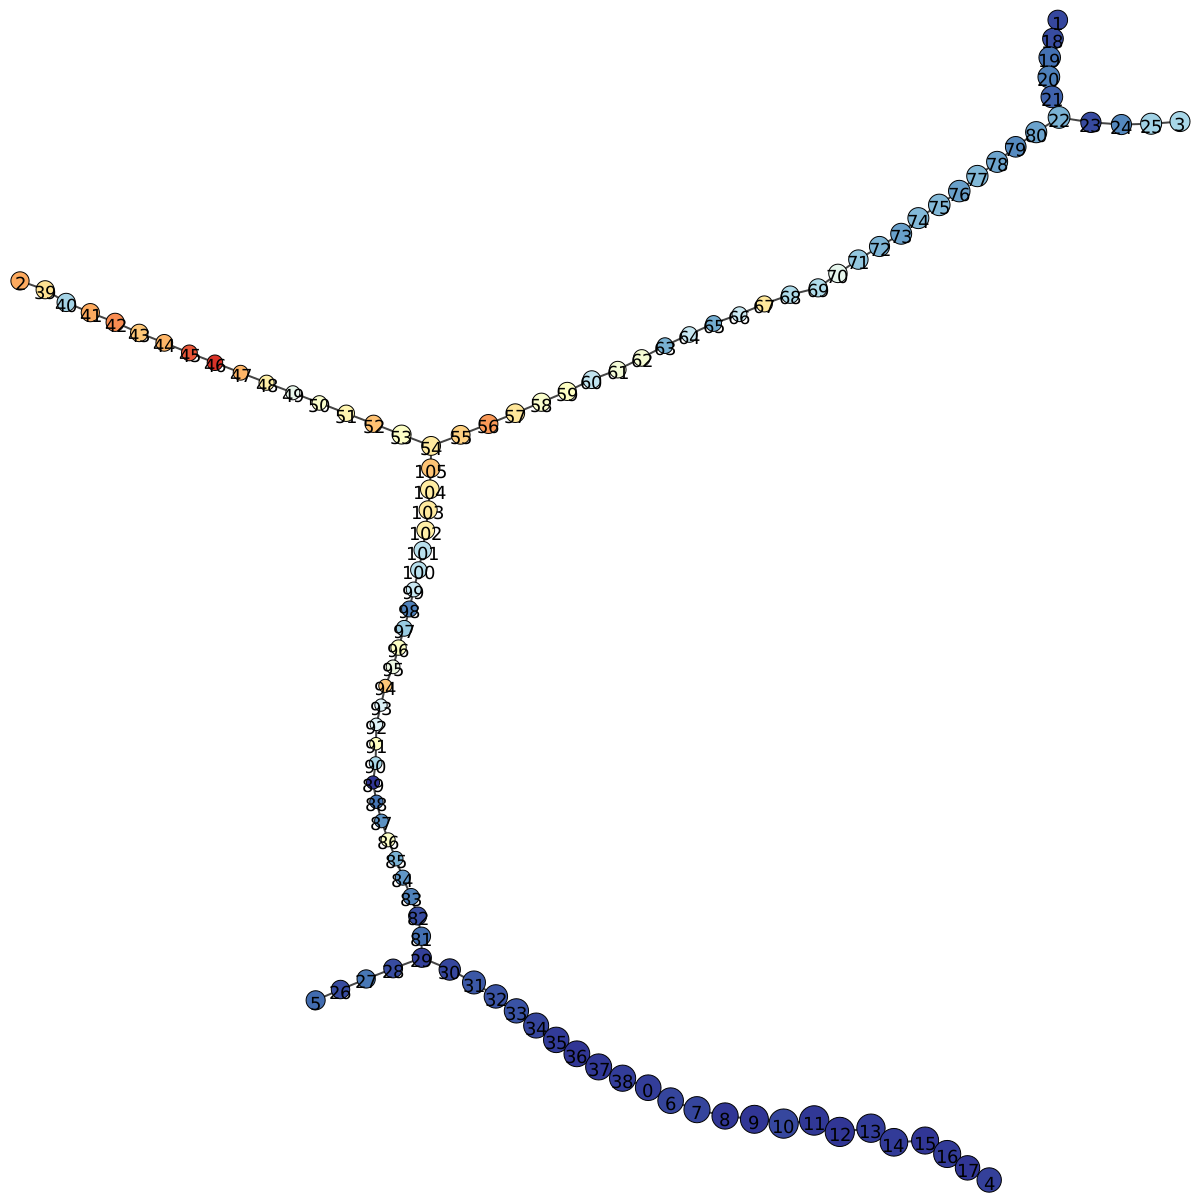

In [32]:
analysis.plot_save_graph( seed=seed, overlay=data_raw['CD34'], file_out='CD34_with_ids', upper_range=2.5, node_label_size=18)

In [33]:
traj_files = !ls /home/herrinca/Desktop/Test/ | grep _traj*

In [34]:
import igraph
from igraph import *
from sklearn.metrics import pairwise_distances

def create_igraph( graph_id, data, file_path):
    
    # node_data_indices are the node indices from the data set used to run pCreode
    node_data_indices = np.genfromtxt( file_path + 'ind_{}.csv'.format( graph_id), delimiter=',').astype( int)
    num_nodes = len( node_data_indices)
    # node_graph_indices refers to the node indices within the graph
    node_graph_indices = np.arange( num_nodes)

    # read adjacency matrix for graph
    adj = pd.read_table( file_path + 'adj_{}.txt'.format( graph_id), sep=" ", header=None)
    # get distance between nodes in graph
    dist  = pairwise_distances( data[node_data_indices,:], data[node_data_indices,:], n_jobs=1, metric='l2')
    # calculate weighted adjacency matric
    w_adj = np.multiply( adj.values, dist)
    # create graph to plots
    graph = igraph.Graph.Weighted_Adjacency( w_adj.tolist(), mode=ADJ_UNDIRECTED)
    graph.vs["label"] = range( 0, num_nodes+1)

    return( graph)

In [35]:
gid_graph = create_igraph( gid, pca_reduced_data, file_path)

In [36]:
#degs = np.ravel( gid_graph.degree())

In [37]:
# start nodes IDs for each branch to be analyized
# If a start ID for a trajectory is not supplied that trajectory will be ignored
#starts = np.array( [36,40,60,23], dtype=int)
#ends = np.argwhere( degs==1).flatten()
# this doesnt work below because it may find a closer end rather than the trajectory inteneded
#ends[np.argsort( pcreode.get_graph_distance( starts, ends, gid_graph), axis=1)[:,0]

In [38]:
# find the closest corresponding ends for each start ID (i.e. get the trajectory)


In [86]:
# create a nested array to hold start and ends of trajectories of interest ([start1,end1],[start2,end2],...)
# *** code assumees the end node has degree of one (eg its an actual end node) ***
starts2ends = np.array( [[51,2],[27,5],[34,4],[20,1],[23,3]]) #[[36,0],[40,3],[60,2],[23,4]]
traj_names  = np.array( ['stems', 'mega', 'erythro', 'neutro', 'mono'])
len( starts2ends)

5

In [40]:
# create nested array to hold indices for each trajectories
trajs = np.empty( len( starts2ends), dtype=object)
# iterate through to gather trajectory indices for each
for itr, ii in enumerate( starts2ends):
    trajs[itr] = np.array( gid_graph.get_shortest_paths( ii[0],ii[1])[0])

In [41]:
trajs

array([array([51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,  2]),
       array([27, 26,  5]),
       array([34, 35, 36, 37, 38,  0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17,  4]),
       array([20, 19, 18,  1]), array([23, 24, 25,  3])], dtype=object)

In [42]:
traj_ids = np.array( [], dtype=int)
for itr, cc in enumerate( trajs, 1):
    traj_ids = np.append( traj_ids, [itr]*len(cc))
    
traj_ids

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5])

In [43]:
np.concatenate( trajs)

array([51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,  2, 27, 26,  5,
       34, 35, 36, 37, 38,  0,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17,  4, 20, 19, 18,  1, 23, 24, 25,  3])

In [44]:
node_ids = np.zeros( gid_graph.vcount(), dtype=int)

In [45]:
node_ids[np.concatenate( trajs)] = traj_ids

In [46]:
import matplotlib
colors   = np.array( [])
for name, hex in matplotlib.colors.cnames.iteritems():
    colors = np.append( colors, hex) 

In [47]:
gid_graph.vs["color"] = [colors[kk] for kk in node_ids]

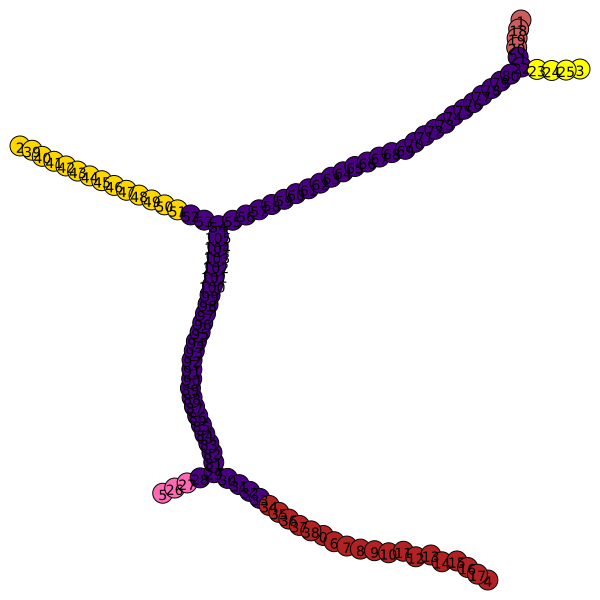

In [48]:
# plot graph traj_ids to be sure we have what we want
import random
random.seed( seed)
layout = gid_graph.layout_kamada_kawai( maxiter=2000, sigma=1000.0)
igraph.plot( gid_graph, layout=layout, box=[200,200])

In [71]:
#ends   = starts2ends[:,1]
#starts = starts2ends[:,0]
#trajs

In [151]:
# create dataframe to hold summary statistics with same indices as data files
togetind = pd.read_csv( file_path+traj_files[0], index_col=[0])
summary  = pd.DataFrame( index=togetind.index.copy())
# pull trajectories from each data file produced with analysis.get_complete_analyte_gene_trajectories()
for file_itr in traj_files:
    # read in data traj files
    data_itr = pd.read_csv( file_path + file_itr, index_col=[0])
    for names_itr, traj_itr in enumerate( trajs):
        # match file to trajectories
        isintest = np.all( np.isin( traj_itr, data_itr.columns.values.astype(int)))
        if( isintest):
            data_traj_itr = data_itr[traj_itr.astype( str)].copy()
            summary["{}_mean".format(traj_names[names_itr])] = data_traj_itr.mean(axis=1)
            #summary["{}_var".format( traj_names[names_itr])] = data_traj_itr.var( axis=1)
        else:
            continue
                

In [152]:
summary.head()

,stems_mean,neutro_mean,mono_mean,erythro_mean,mega_mean
1100001G20RIK,0.000085,0.243541,0.014569,0.003030,0.000000
1190002H23RIK,0.024047,0.354537,0.254054,0.038721,0.005134
1190007F08RIK,0.000940,0.005058,0.005416,0.074915,0.022580
2210020M01RIK,0.010517,0.001598,0.005098,0.081062,0.117415
3110082D06RIK,0.001644,0.000000,0.001736,0.000000,0.001423


In [153]:
top_genes = np.array( [], dtype=str)
# get top 25 expressing genes for each phenotype
for names_itr in traj_names:
    top_genes = np.append( top_genes, summary["{}_mean".format(names_itr)].sort_values().index[-25:])

In [154]:
len( top_genes), len( np.unique( top_genes))

(125, 45)

In [155]:
#pd.value_counts( top_genes)!=5

In [156]:
good_genes = pd.DataFrame( summary, index=np.unique( top_genes), columns=summary.columns)
good_genes.head()

,stems_mean,neutro_mean,mono_mean,erythro_mean,mega_mean
ARHGDIB,0.501080,0.909190,0.641884,0.216471,0.602999
ATPIF1,0.650447,0.647315,0.664153,1.228791,0.798738
CALR,1.152235,2.009028,2.095215,0.490063,0.475406
CAR1,0.047363,0.148592,0.249891,1.669453,0.418789
CAR2,0.061642,0.182589,0.215348,1.487939,0.886822


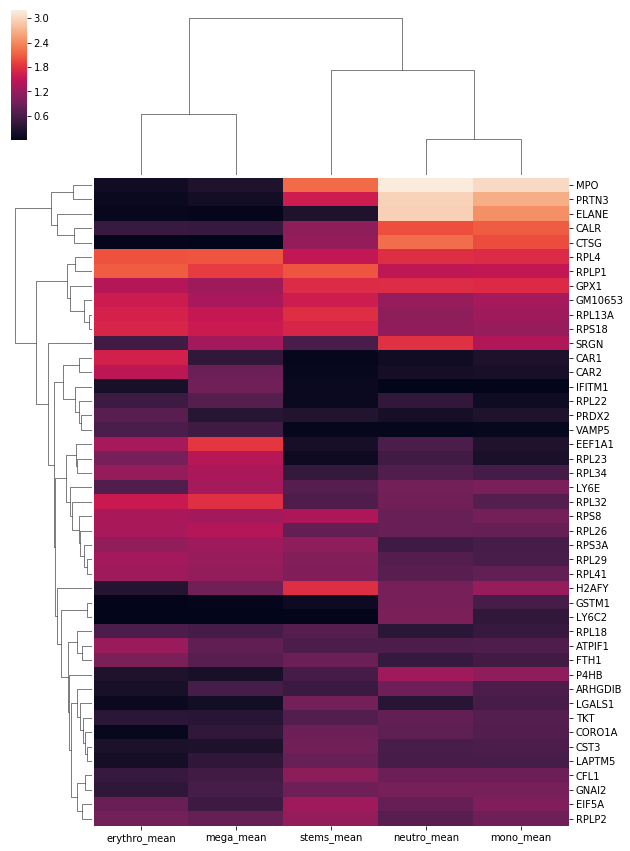

In [157]:
import seaborn as sns
cm = sns.clustermap( good_genes, figsize=(10,15))